# Language model

## one-hot encoding

In [0]:
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
# 초기 데이터: 각 원소가 샘플입니다
# (이 예에서 하나의 샘플이 하나의 문장입니다. 하지만 문서 전체가 될 수도 있습니다)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다
token_index = {}
for sample in samples:
    # split() 메서드를 사용해 샘플을 토큰으로 나눕니다.
    # 실전에서는 구둣점과 특수 문자도 사용합니다.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당합니다.
            token_index[word] = len(token_index) + 1
            # 인덱스 0은 사용하지 않습니다.

# 샘플을 벡터로 변환합니다.
# 각 샘플에서 max_length 까지 단어만 사용합니다.
max_length = 10

# 결과를 저장할 배열입니다
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [0]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## keras 의 Tokenizer 사용

In [0]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=10)
# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)

# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다.
# 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [0]:
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


## document representations

단어의 one-hot encoding 을 활용하여 document를 vector로 나타내는 방법들

one-hot encoding 과 같이 dictionary 의 크기가 벡터의 크기가 됨

- bag of words
- tf-idf

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
bow = CountVectorizer()
tfidf = TfidfVectorizer()

In [0]:
bow.fit(samples)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
bow.transform(samples).toarray()

array([[0, 1, 0, 0, 1, 0, 1, 1, 2],
       [1, 0, 1, 1, 0, 1, 0, 0, 1]])

In [0]:
tfidf.fit(samples)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
tfidf.transform(samples).toarray()

array([[0.        , 0.40740124, 0.        , 0.        , 0.40740124,
        0.        , 0.40740124, 0.40740124, 0.57973867],
       [0.47107781, 0.        , 0.47107781, 0.47107781, 0.        ,
        0.47107781, 0.        , 0.        , 0.33517574]])

## Embedding 층을 사용하여 단어 임베딩 학습

- 단어를 one-hot encoding 으로 나타낼 경우 단어 dictionary 만큼의 dimension 을 갖게 됨
- 높은 차원을 가지고 있지만 실제 array 는 sparse 함
- 단어에 대한 vector를 학습을 통해서 구하고자함
- embedding layer 는 특정 단어를 나타내는 정수 index 를 밀집 벡터로 매핑하는 것으로 이해할 수 있음
- 정수를 입력으로 받아 이 정수에 연관된 벡터를 찾아 반환함

In [0]:
from keras.layers import Embedding

### IMDB 영화 리뷰 데이터 이용한 실습

In [0]:
from keras.datasets import imdb
from keras import preprocessing

In [0]:
max_features = 10000
maxlen = 20 # 한 개의 document 중에 가장 빈번한 단어 20개만 사용

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


### MLP 모형을 통한 감성 예측

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.6759 - acc: 0.6049 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.5657 - acc: 0.7

## RNN IMDB 예측

In [0]:
from keras.preprocessing import sequence

- 앞의 MLP 와는 달리 RNN 모델은 데이터를 문서 하나를 하나의 데이터로 보는 것이 아닌 문서 하나를 단어들의 sequence 로 봄
- 이에 맞는 전처리 방법이 필요 (sequence padding)

In [0]:
max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이
batch_size = 32

print('데이터 로딩...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [0]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

**load word index part**

**index to word** and **word to index** 

In [0]:
word_idx = imdb.get_word_index()

In [0]:
INDEX_FROM=3 
word_to_id = word_idx
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}

In [0]:
print(id_to_word[32])

all


In [0]:
print(input_train)

[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


- intput 과 output을 단어의 sequence로 보기 위해서 데이터들은 단어의 index 의 sequence로 전처리 수행
- 최대 길이를 500 으로 하였으므로 이보다 짧은 길이는 앞 부분이 0 으로 padding 됨

In [0]:
from keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 905us/step - loss: 0.5965 - acc: 0.6678 - val_loss: 0.5930 - val_acc: 0.6788
Epoch 2/10
20000/20000 [==============================] - 18s 883us/step - loss: 0.3898 - acc: 0.8375 - val_loss: 0.3504 - val_acc: 0.8572
Epoch 3/10
20000/20000 [==============================] - 18s 878us/step - loss: 0.2741 - acc: 0.8924 - val_loss: 0.3563 - val_acc: 0.8592
Epoch 4/10
20000/20000 [==============================] - 17s 874us/step - loss: 0.2057 - acc: 0.9236 - val_loss: 0.3426 - val_acc: 0.8678
Epoch 5/10
20000/20000 [==============================] - 17s 868us/step - loss: 0.1458 - acc: 0.9499 - val_loss: 0.3849 - val_acc: 0.8542
Epoch 6/10
20000/20000 [==============================] - 18s 891us/step - loss: 0.0901 - acc: 0.9701 - val_loss: 0.4540 - val_acc: 0.8348
Epoch 7/10
20000/20000 [==============================] - 18s 876us/step - loss: 0.0642 - acc: 0.9788 - val_loss: 0.4

In [0]:
import matplotlib.pyplot as plt

훈련과 검증 정확도 그래프로 그리기

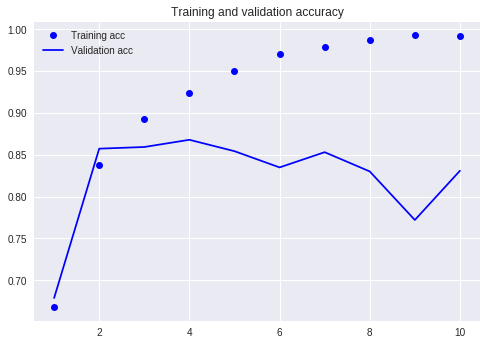

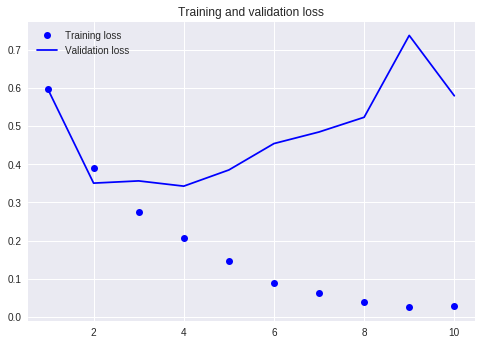

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## LSTM model 이용

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.5012 - acc: 0.7608 - val_loss: 0.3293 - val_acc: 0.8660
Epoch 2/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.2923 - acc: 0.8851 - val_loss: 0.3333 - val_acc: 0.8598
Epoch 3/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2269 - acc: 0.9147 - val_loss: 0.3888 - val_acc: 0.8688
Epoch 4/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1942 - acc: 0.9295 - val_loss: 0.3299 - val_acc: 0.8882
Epoch 5/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1725 - acc: 0.9379 - val_loss: 0.2981 - val_acc: 0.8816
Epoch 6/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1566 - acc: 0.9438 - val_loss: 0.3117 - val_acc: 0.8802
Epoch 7/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.1377 - acc: 0.9511 - val_loss: 0.4718 - val_acc:

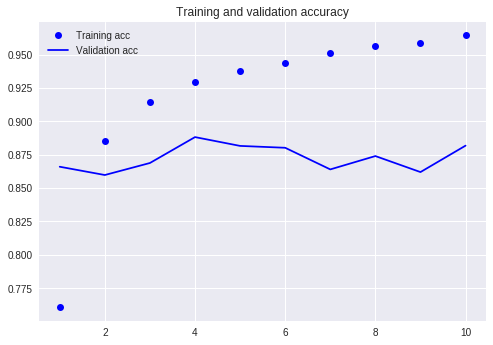

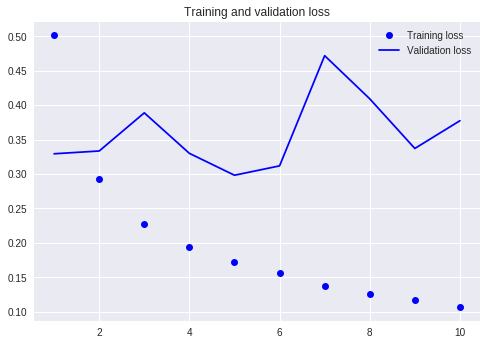

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()